('Loss of the ', 0, ' iteration for train:', 1.0)
('Loss of the ', 0, ' iteration for validation:', 1.0)
('Loss of the ', 1, ' iteration for train:', 0.90368073415983219)
('Loss of the ', 1, ' iteration for validation:', 0.89680571349415805)
('Loss of the ', 2, ' iteration for train:', 0.80740309083796746)
('Loss of the ', 2, ' iteration for validation:', 0.79368333259292445)
('Loss of the ', 3, ' iteration for train:', 0.71116705239083144)
('Loss of the ', 3, ' iteration for validation:', 0.6906328213481675)
('Loss of the ', 4, ' iteration for train:', 0.61502122940876869)
('Loss of the ', 4, ' iteration for validation:', 0.58784009852090724)
('Loss of the ', 5, ' iteration for train:', 0.54050771304980427)
('Loss of the ', 5, ' iteration for validation:', 0.51045007082949523)
('Loss of the ', 6, ' iteration for train:', 0.49656763384978392)
('Loss of the ', 6, ' iteration for validation:', 0.47672199752195932)
('Loss of the ', 7, ' iteration for train:', 0.45337043880194244)
('Loss o

('Loss of the ', 61, ' iteration for train:', 0.29420049830602851)
('Loss of the ', 61, ' iteration for validation:', 0.30265068775168452)
('Loss of the ', 62, ' iteration for train:', 0.29412431201037387)
('Loss of the ', 62, ' iteration for validation:', 0.30259618219842133)
('Loss of the ', 63, ' iteration for train:', 0.29404514980217666)
('Loss of the ', 63, ' iteration for validation:', 0.30244175649278032)
('Loss of the ', 64, ' iteration for train:', 0.29396949430808089)
('Loss of the ', 64, ' iteration for validation:', 0.30238613722962704)
('Loss of the ', 65, ' iteration for train:', 0.29389180961271788)
('Loss of the ', 65, ' iteration for validation:', 0.30224049657854335)
('Loss of the ', 66, ' iteration for train:', 0.29382192279263192)
('Loss of the ', 66, ' iteration for validation:', 0.30228081354191938)
('Loss of the ', 67, ' iteration for train:', 0.29376367732041292)
('Loss of the ', 67, ' iteration for validation:', 0.30202381691449343)
('Loss of the ', 68, ' iter

('Loss of the ', 123, ' iteration for train:', 0.29207810103204068)
('Loss of the ', 123, ' iteration for validation:', 0.30033003326114732)
('Loss of the ', 124, ' iteration for train:', 0.29158435456888965)
('Loss of the ', 124, ' iteration for validation:', 0.30197126802139451)
('Loss of the ', 125, ' iteration for train:', 0.29214424061522692)
('Loss of the ', 125, ' iteration for validation:', 0.30043072888814132)
('Loss of the ', 126, ' iteration for train:', 0.29142786386011177)
('Loss of the ', 126, ' iteration for validation:', 0.3018709258013661)
('Loss of the ', 127, ' iteration for train:', 0.29174534908972583)
('Loss of the ', 127, ' iteration for validation:', 0.30033815943336001)
('Loss of the ', 128, ' iteration for train:', 0.29150586007264523)
('Loss of the ', 128, ' iteration for validation:', 0.3019807166061329)
('Loss of the ', 129, ' iteration for train:', 0.29190613577464425)
('Loss of the ', 129, ' iteration for validation:', 0.30043099153008929)
('Loss of the '

('Loss of the ', 183, ' iteration for train:', 0.29163227199500508)
('Loss of the ', 183, ' iteration for validation:', 0.30191357927895435)
('Loss of the ', 184, ' iteration for train:', 0.29185771817277467)
('Loss of the ', 184, ' iteration for validation:', 0.3040794802881398)
('Loss of the ', 185, ' iteration for train:', 0.29199027940006544)
('Loss of the ', 185, ' iteration for validation:', 0.30220454261922286)
('Loss of the ', 186, ' iteration for train:', 0.29156436840070427)
('Loss of the ', 186, ' iteration for validation:', 0.30394458941258418)
('Loss of the ', 187, ' iteration for train:', 0.29115414428056652)
('Loss of the ', 187, ' iteration for validation:', 0.30203691071445277)
('Loss of the ', 188, ' iteration for train:', 0.29117515737869687)
('Loss of the ', 188, ' iteration for validation:', 0.303584115274044)
('Loss of the ', 189, ' iteration for train:', 0.29080571333383887)
('Loss of the ', 189, ' iteration for validation:', 0.30192197815057303)
('Loss of the ',

('Loss of the ', 243, ' iteration for train:', 0.29020833315651678)
('Loss of the ', 243, ' iteration for validation:', 0.30360796604905516)
('Loss of the ', 244, ' iteration for train:', 0.29024594682077798)
('Loss of the ', 244, ' iteration for validation:', 0.30469540048569588)
('Loss of the ', 245, ' iteration for train:', 0.29028314374446168)
('Loss of the ', 245, ' iteration for validation:', 0.30353953231053205)
('Loss of the ', 246, ' iteration for train:', 0.29054782223727876)
('Loss of the ', 246, ' iteration for validation:', 0.30507875456856381)
('Loss of the ', 247, ' iteration for train:', 0.29080513581386047)
('Loss of the ', 247, ' iteration for validation:', 0.30373967741945901)
('Loss of the ', 248, ' iteration for train:', 0.29104618219367123)
('Loss of the ', 248, ' iteration for validation:', 0.30563152354745654)
('Loss of the ', 249, ' iteration for train:', 0.29111593690899379)
('Loss of the ', 249, ' iteration for validation:', 0.30393354085514634)
('Loss of the

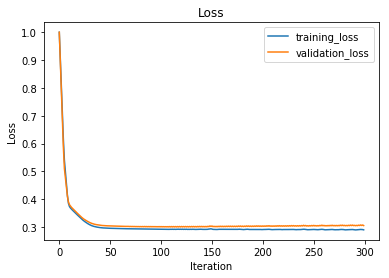

In [1]:
# !python3
# -*- coding:utf-8 -*-
from numpy import *
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt
# %matplotlib inline

LEARNING_RATE = 0.1
NUM_ITERATIONS = 300


def get_data(filename):
    data = sklearn.datasets.load_svmlight_file(filename)
    return data[0], data[1]


def compute_loss(X, y, theta, b):
    # hinge loss
    loss = 0.0
    for(dx, dy) in zip(X, y):
        pred = dot(dx, theta) + b
        loss += max(0, 1-dy*pred)
    norm = linalg.norm(theta)**2
    loss = mean(loss)+norm/2.0
    return loss/shape(X)[0]


def optimizer_GD(X_train, y_train, X_validation, y_validation, ini_theta, ini_b, learning_rate, num_iterations):
    theta = ini_theta
    b = ini_b
    C = 1.1
    Ltrain = []
    Lvalidation = []
    for i in xrange(num_iterations):
        Ltrain.append(compute_loss(X_train, y_train, theta, b))
        Lvalidation.append(compute_loss(X_validation, y_validation, theta, b))
        print('Loss of the ', i, ' iteration for train:', Ltrain[i])
        print('Loss of the ', i, ' iteration for validation:', Lvalidation[i])
        G = zeros(shape=(len(theta), 1))
        B = 0
        for (dx,dy) in zip(X_train,y_train):
            if 1-(dy*(dot(dx, theta)+b)) >= 0:
                y = sum(dy)
                G += -y*dx.T
                B += -y
        G = theta + C*G
        B = C*B
        theta = theta - learning_rate * G/shape(X_train)[0]
        b = b - learning_rate * B/shape(X_train)[0]
    return Ltrain, Lvalidation


def main():
    # load data
    X, y = get_data('./data/australian_scale')
    X = X.todense()
    y = y.reshape(len(y), 1)

    # devide dataset
    X_train, X_validation, y_train, y_validation = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

    # initialize parameters
    n = shape(X_train)[1]  # number of features
    m_train = shape(X_train)[0]  # number of training examples
    lr = LEARNING_RATE
    num_iter = NUM_ITERATIONS
    initial_theta = zeros(shape=(n, 1))
    ini_b = 0

    # Linear Classification and Gradient Descent
    Ltrain, Lvalidation = optimizer_GD(X_train, y_train, X_validation, y_validation, initial_theta, ini_b, lr, num_iter)

    # visualization
    num_iter = xrange(num_iter)
    plt.plot(num_iter, Ltrain, label='training_loss')
    plt.plot(num_iter, Lvalidation, label='validation_loss')
    plt.title('Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


if __name__=='__main__':
    main()




